In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("cleaned_data.csv")

In [3]:
model_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_year
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure_Year1
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,tenure_Year3
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure_Year1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,tenure_Year4
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure_Year1


In [3]:
#Scaling and Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#separated id and target
id_column = ['customerID']
target = ['Churn']

# code to filter categorical column
categorical_columns = data.nunique()[data.nunique()<=6].keys().tolist()
categorical_columns = [x for x in categorical_columns if x not in target]

#code to filter numerical columns
numerical_columns =[x for x in data.columns if x not in id_column + target + categorical_columns]

#taking out binary columns
binary_columns = data.nunique()[data.nunique()==2].keys().tolist()

#code to choose  multiple columns from binary. we separated binary to label encode it as 0 or 1. and we well have 0 and 1 columns for multiple
multi_columns = [x for x in categorical_columns if x not in binary_columns]


label_encoder = LabelEncoder()

for i in binary_columns:
    data[i]=label_encoder.fit_transform(data[i])

data = pd.get_dummies(data=data, columns= multi_columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns= numerical_columns)

copy_data = data.copy()
data = data.drop(columns= numerical_columns, axis=1)
data= data.merge(scaled_data,left_index= True, right_index = True,how="left")


Logistic Regression Modelling
since the business use case is towards finding more customers who are most likely to churn we will focus more on sensitivity and less on specificity. 
will use roc and auc curve to compare models. 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

train,test = train_test_split(data, test_size=0.25,random_state=42)

columns =[i for i in data.columns if i not in id_column+ target]
train_x = train[columns]
train_y = train[target]
test_x = test[columns]
test_y = test[target]

LR  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LR.fit(train_x, train_y)
predictions = LR.predict(test_x)
probabilities = LR.predict_proba(test_x)

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.63      0.48      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



In [6]:
print(accuracy_score(test_y, predictions))

0.7918088737201365


In [23]:
print(confusion_matrix(test_y,predictions))

[[1170  130]
 [ 236  222]]


In [10]:
n_classes = data[target].shape[1]

In [26]:
from sklearn import metrics
preds = probabilities[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

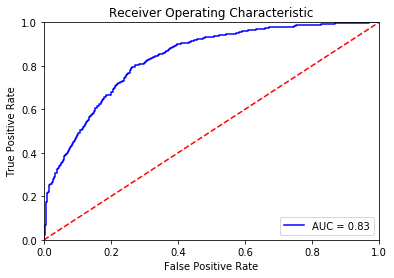

In [27]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

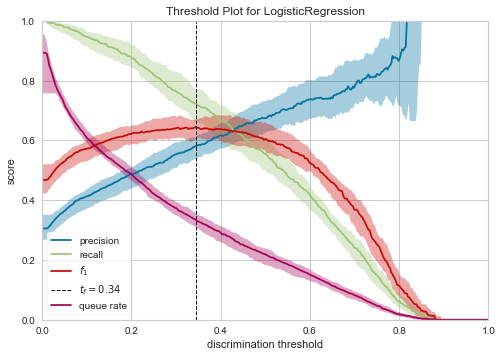

In [35]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(LR)
visualizer.fit(train_x,train_y)
visualizer.poof()

In [40]:
data["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64